In [1]:
import ctypes
libgcc_s = ctypes.CDLL('libgcc_s.so.1')
import torch
#torch.manual_seed(0)
from torchvision import datasets, transforms

from projections import LayerModifierZCA
from notebook_train import run_train_test_loop, test
from cifar_model import mCNN_k, mCNN_k_g, mCNN_fixed


# Mode 0 i.e. equivalent to Gated Linear Units = Sigmoid$(w_1^Tx)*(w_2^Tx)$, both $w_1, w_2$ are learnable, works as well as ReLUs.

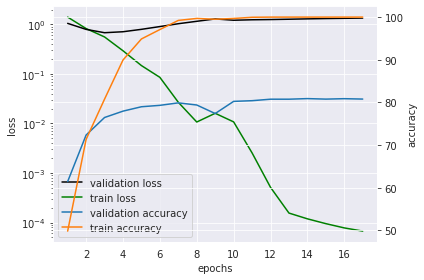

KeyboardInterrupt: 

In [2]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_k_g().to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_g0", epochs=50, device=device)    

#print('c')    
    



In [3]:
model = mCNN_k_g().cuda().eval()
state_dict = torch.load("models/cifar_10_g0.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.2953767977654933, 80.9)

# Mode 1 i.e. = Sigmoid$(w_1^Tx)*(w_{\text{init}}^Tx)$, only $w_1$ is learnable.

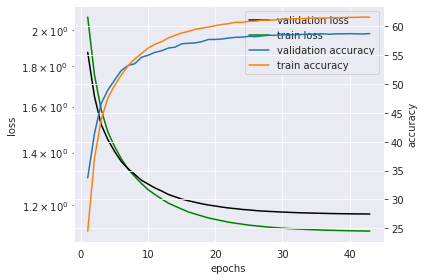

KeyboardInterrupt: 

In [4]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_k_g(mode=1).to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_g1", epochs=50, device=device)    

#print('c')    
    



In [5]:
model = mCNN_k_g(mode=1).cuda().eval()
state_dict = torch.load("models/cifar_10_g1.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.1703442946076392, 58.77)

# Mode 2 i.e. = Sigmoid$(w_{\text{init}}^Tx)*(w_{2}^Tx)$, only $w_2$ is learnable.

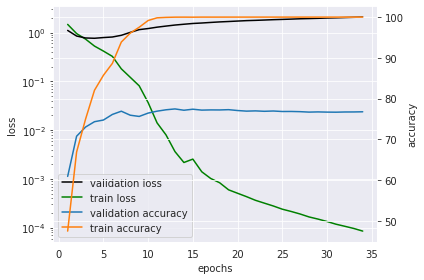

KeyboardInterrupt: 

In [6]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_k_g(mode=2).to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_g2", epochs=50, device=device)    

#print('c')    
    



In [7]:
model = mCNN_k_g(mode=2).cuda().eval()
state_dict = torch.load("models/cifar_10_g2.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.431521588563919, 77.49)

# Mode 2 i.e. = Sigmoid$(w_{\text{init}}^Tx)*(w_{2}^Tx)$, only $w_2$ is learnable WITH 4x width

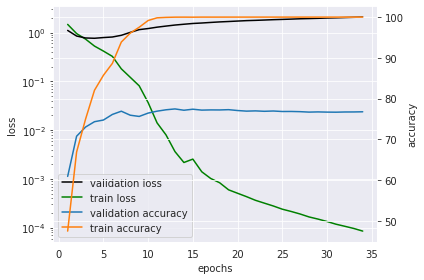

KeyboardInterrupt: 

In [6]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_k_g(c = 256, mode=2).to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_g2", epochs=50, device=device)    

#print('c')    
    



In [7]:
model = mCNN_k_g(c = 256, mode=2).cuda().eval()
state_dict = torch.load("models/cifar_10_g2.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.431521588563919, 77.49)

# Fixed Mode 0 i.e. normal neural network

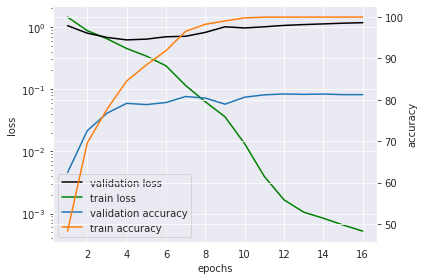

KeyboardInterrupt: 

In [2]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_fixed().to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_f0", epochs=50, device=device)    

#print('c')    
    



In [3]:
model = mCNN_fixed().cuda().eval()
state_dict = torch.load("models/cifar_10_f0.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.0566362366080284, 81.42)

# Fixed Mode 1 i.e. fixing gating to init gating

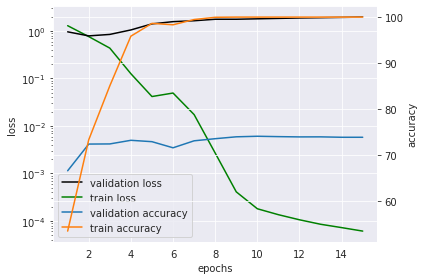

Exception in thread Thread-34:
Traceback (most recent call last):
  File "/n/sw/eb/apps/centos7/Anaconda3/2020.11/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/n/sw/eb/apps/centos7/Anaconda3/2020.11/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/n/home04/nvyas/.local/lib/python3.8/site-packages/torch/utils/data/_utils/pin_memory.py", line 28, in _pin_memory_loop
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/n/sw/eb/apps/centos7/Anaconda3/2020.11/lib/python3.8/multiprocessing/queues.py", line 116, in get
    return _ForkingPickler.loads(res)
  File "/n/home04/nvyas/.local/lib/python3.8/site-packages/torch/multiprocessing/reductions.py", line 289, in rebuild_storage_fd
    fd = df.detach()
  File "/n/sw/eb/apps/centos7/Anaconda3/2020.11/lib/python3.8/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/n/sw/eb

KeyboardInterrupt: 

In [2]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_fixed(mode = 1).to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_f1", epochs=50, device=device)    

#print('c')    
    



In [3]:
model = mCNN_fixed(mode = 1).cuda().eval()
state_dict = torch.load("models/cifar_10_f1.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.8063334658741952, 74.06)

# Fixed Mode 1 i.e. fixing gating to init gating, WITH 4x width this time

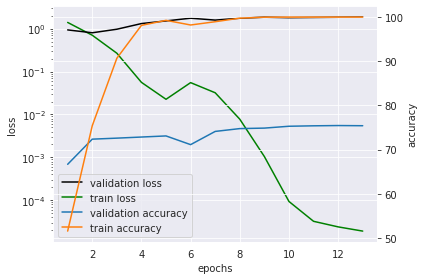

KeyboardInterrupt: 

In [4]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_fixed(c = 256, mode = 1).to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_f1", epochs=50, device=device)    

#print('c')    
    



In [3]:
model = mCNN_fixed(c = 256, mode = 1).cuda().eval()
state_dict = torch.load("models/cifar_10_f1.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.8063334658741952, 74.06)

# Fixed Mode 2 i.e. fixing gating to another init gating

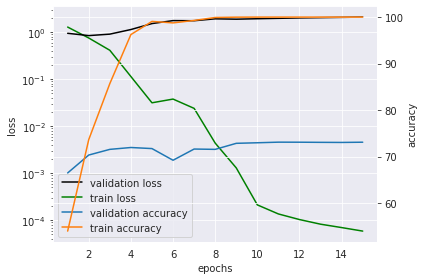

KeyboardInterrupt: 

In [2]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_fixed(mode = 2).to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_f2", epochs=50, device=device)    

#print('c')    
    



In [3]:
model = mCNN_fixed(mode = 2).cuda().eval()
state_dict = torch.load("models/cifar_10_f2.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.9711699217557908, 73.11)

# Fixed Mode 3 i.e. no learning in Conv layers, linear still learnt, just a sanity check

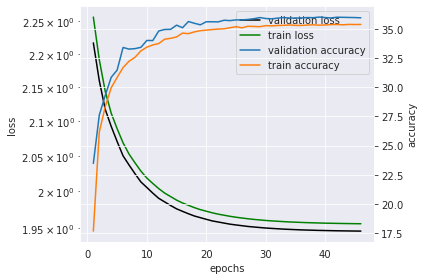

KeyboardInterrupt: 

In [2]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_fixed(mode = 3).to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_f3", epochs=50, device=device)    

#print('c')    
    



In [3]:
model = mCNN_fixed(mode = 3).cuda().eval()
state_dict = torch.load("models/cifar_10_f3.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.946795219182968, 36.01)